### Deliverable 3: Preprocessing the Data for a Neural Network

#### Steps done for optimization

##### 1. Drop only 'EIN'
##### 2. Convert 'ASK_AMT' from int64 to string and bin it as 5000 and other
##### 3. Bin 'NAME' with count < 12 as other
##### 4. Model 1
##### 4.1. y has IS_SUCCESSFUL
##### 4.2. X drops IS_SUCCESSFUL and STATUS
##### 4.3. Number of input features: 238; layer1 nodes: 238*2, activation = relu; layer 2 nodes: 238, activation=relu; output: 1 activation=sigmoid
##### 4.4. epochs=100
##### 5. Model 2
##### 5.1. y has IS_SUCCESSFUL
##### 5.2. X drop IS_SUCCESSFUL
##### 5.3. Number of input features: 239; layer1 nodes: 239*2, activation = relu; layer 2 nodes: 239, activation=relu; 
##### 5.4. layer 3 nodes: 239/2, activation=relu; layer 2 nodes: 239/4, activation=relu; output: 1 activation=sigmoid; epochs=100
##### 6. Model 3
##### 6.1. y has IS_SUCCESSFUL
##### 6.2. X drop IS_SUCCESSFUL
##### 6.3. Number of input features: 239; layer1 nodes: 239*2, activation = relu; layer 2 nodes: 239, activation=tanh; 
##### 6.4. layer 3 nodes: 239/2, activation=tanh; layer 2 nodes: 239/4, activation=relu; output: 1 activation=sigmoid; epochs=50
##### 7. Recommending Model 3

In [157]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [158]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
# application_df = application_df.drop(columns=['EIN','NAME'])
application_df = application_df.drop(columns=['EIN'])

application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [159]:
application_df['ASK_AMT'] = application_df['ASK_AMT'].apply(str)

In [160]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [161]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

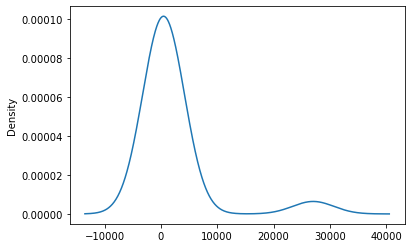

In [162]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
application_type_counts.plot.density()

In [163]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [164]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2380        1
C1570        1
C1236        1
C1370        1
C1248        1
Name: CLASSIFICATION, Length: 71, dtype: int64

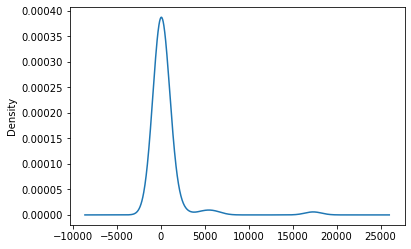

In [165]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
classification_counts.plot.density()

In [166]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [167]:
# ASK AMT s
askamt_counts = application_df.ASK_AMT.value_counts()
askamt_counts

5000       25398
63981          3
10478          3
6725           3
15583          3
           ...  
108180         1
39863          1
26211          1
9147           1
1373450        1
Name: ASK_AMT, Length: 8747, dtype: int64

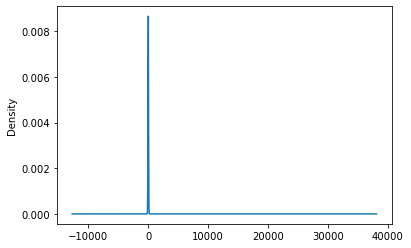

In [168]:
askamt_counts.plot.density()

In [169]:
print(min(application_df.ASK_AMT))
print(max(application_df.ASK_AMT))

10000
99982


In [170]:

replace_askamt = list(askamt_counts[askamt_counts < 5].index)

# Replace in dataframe
for cls in replace_askamt:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

5000     25398
Other     8901
Name: ASK_AMT, dtype: int64

In [171]:
name_counts = application_df.NAME.value_counts()
name_counts

PARENT BOOSTER USA INC                                1260
TOPS CLUB INC                                          765
UNITED STATES BOWLING CONGRESS INC                     700
WASHINGTON STATE UNIVERSITY                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC        408
                                                      ... 
NATIONAL ASSOCIATION OF THEATRE OWNERS OF ARKANSAS       1
NATIONAL ASSOCATION OF SCHOLARS                          1
HAPPINESS OPPORTUNITY PROJECT INC                        1
KANSAS TICK-BORNE DISEASE ADVOCATES INC                  1
US IMMIGRATION HOPE INC                                  1
Name: NAME, Length: 19568, dtype: int64

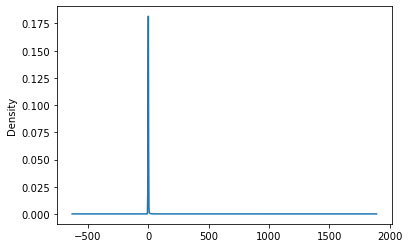

In [172]:
name_counts.plot.density()

In [173]:
replace_name = list(name_counts[name_counts < 12].index)

# Replace in dataframe
for cls in replace_name:
    application_df.NAME = application_df.NAME.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                          21312
PARENT BOOSTER USA INC                                          1260
TOPS CLUB INC                                                    765
UNITED STATES BOWLING CONGRESS INC                               700
WASHINGTON STATE UNIVERSITY                                      492
                                                               ...  
AMIGOS DE LAS AMERICAS                                            12
AMERICAN FEDERATION OF LABOR & CONGRESS OF INDUSTRIAL ORGS        12
ZONTA INTERNATIONAL                                               12
PROJECT MANAGEMENT INSTITUTE                                      12
INTERNATIONAL ASSOCIATION OF MACHINISTS & AEROSPACE WORKERS       12
Name: NAME, Length: 195, dtype: int64

In [174]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT']

In [175]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ART THERAPY ASSOCIATION INC,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [176]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)


In [177]:
application_df.head()

,STATUS,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_Other
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Deliverable 3: Model 1

In [178]:
#application_df.dtypes
#y = application_df["STATUS"].values
#X = application_df.drop(["STATUS"],1).values

In [179]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df["IS_SUCCESSFUL"].values
#X = application_df.drop(["IS_SUCCESSFUL", "STATUS", "SPECIAL_CONSIDERATIONS_N", "SPECIAL_CONSIDERATIONS_Y"],1).values
X = application_df.drop(["IS_SUCCESSFUL", "STATUS"],1).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [180]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [181]:
#X_train_scaled[0]

In [182]:
len(X_train[0])

238

In [183]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
# layer 1 has num_feat * 2, layer 2 has num_feat
number_input_features = len(X_train[0])
hidden_nodes_layer1   =  number_input_features * 2
hidden_nodes_layer2   =  number_input_features

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 476)               113764    
_________________________________________________________________
dense_54 (Dense)             (None, 238)               113526    
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 239       
Total params: 227,529
Trainable params: 227,529
Non-trainable params: 0
_________________________________________________________________


In [184]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.m1.{epoch:02d}.hdf5"

In [185]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)
    #save_freq=1000)

In [186]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])
#fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4728 - accuracy: 0.7701
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4493 - accuracy: 0.7816
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4451 - accuracy: 0.7838
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4429 - accuracy: 0.7855
Epoch 5/100
800/804 [============================>.] - ETA: 0s - loss: 0.4424 - accuracy: 0.7858
Epoch 00005: saving model to checkpoints\weights.m1.05.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4425 - accuracy: 0.7856
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4407 - accuracy: 0.7855
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4404 - accuracy: 0.7878
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4384 - accuracy: 0.7883
Epoch 9/100
804/804 [==========================

804/804 [==============================] - 2s 3ms/step - loss: 0.4198 - accuracy: 0.7977
Epoch 65/100
793/804 [============================>.] - ETA: 0s - loss: 0.4190 - accuracy: 0.7982
Epoch 00065: saving model to checkpoints\weights.m1.65.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4193 - accuracy: 0.7980
Epoch 66/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4193 - accuracy: 0.7975
Epoch 67/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4185 - accuracy: 0.7978
Epoch 68/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4201 - accuracy: 0.7986
Epoch 69/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4205 - accuracy: 0.7964
Epoch 70/100
800/804 [============================>.] - ETA: 0s - loss: 0.4195 - accuracy: 0.7977
Epoch 00070: saving model to checkpoints\weights.m1.70.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4196 - accuracy: 0.7978
Epoch 71/

In [187]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6187 - accuracy: 0.7799
Loss: 0.6187007427215576, Accuracy: 0.7799416780471802


In [188]:
nn.save("AlphabetSoupCharity_Optimzation_m1.h5")

### Deliverable 3: Model 2

In [189]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df["IS_SUCCESSFUL"].values
#X = application_df.drop(["IS_SUCCESSFUL", "STATUS", "SPECIAL_CONSIDERATIONS_N", "SPECIAL_CONSIDERATIONS_Y"],1).values
#X = application_df.drop(["IS_SUCCESSFUL", "STATUS"],1).values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [190]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [191]:
len(X_train[0])

239

In [192]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
# layer 1 has num_feat * 2, layer 2 has num_feat, layer 3 has num_feat / 2, layer 4 has num_feat / 4
number_input_features = len(X_train[0])
hidden_nodes_layer1   =  number_input_features * 2
hidden_nodes_layer2   =  number_input_features
hidden_nodes_layer3   =  number_input_features / 2
hidden_nodes_layer4   =  number_input_features / 2 / 2

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
#, activation="leakyrelu"
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, 
                             activation="relu") )
#nn.add(tf.keras.layers.BatchNormalization())
#nn.add(tf.keras.layers.LeakyReLU())

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# third hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# fourth hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 478)               114720    
_________________________________________________________________
dense_57 (Dense)             (None, 239)               114481    
_________________________________________________________________
dense_58 (Dense)             (None, 119)               28560     
_________________________________________________________________
dense_59 (Dense)             (None, 59)                7080      
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 60        
Total params: 264,901
Trainable params: 264,901
Non-trainable params: 0
_________________________________________________________________


In [193]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.m2.{epoch:02d}.hdf5"

# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)
    
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])
#fit_model = nn.fit(X_train_scaled,y_train,epochs=100)


Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4740 - accuracy: 0.7715
Epoch 2/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4505 - accuracy: 0.7816
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4459 - accuracy: 0.7831
Epoch 4/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4443 - accuracy: 0.7848
Epoch 5/100
774/804 [===========================>..] - ETA: 0s - loss: 0.4432 - accuracy: 0.7866
Epoch 00005: saving model to checkpoints\weights.m2.05.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.4417 - accuracy: 0.7871
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4415 - accuracy: 0.7873
Epoch 7/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4395 - accuracy: 0.7875
Epoch 8/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4394 - accuracy: 0.7881
Epoch 9/100
804/804 [==========================

804/804 [==============================] - 3s 3ms/step - loss: 0.4170 - accuracy: 0.7968
Epoch 65/100
528/804 [==================>...........] - ETA: 0s - loss: 0.4187 - accuracy: 0.7968
Epoch 00065: saving model to checkpoints\weights.m2.65.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.4165 - accuracy: 0.7979
Epoch 66/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4178 - accuracy: 0.7982
Epoch 67/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4171 - accuracy: 0.7986
Epoch 68/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4177 - accuracy: 0.7978
Epoch 69/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4187 - accuracy: 0.7988
Epoch 70/100
519/804 [==================>...........] - ETA: 0s - loss: 0.4187 - accuracy: 0.7997
Epoch 00070: saving model to checkpoints\weights.m2.70.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.4199 - accuracy: 0.7980
Epoch 71/

In [194]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 0s - loss: 0.5369 - accuracy: 0.7792
Loss: 0.5369020700454712, Accuracy: 0.7792419791221619


In [195]:
nn.save("AlphabetSoupCharity_Optimzation_m2.h5")

### Deliverable 3: Model 3

In [196]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df["IS_SUCCESSFUL"].values
#X = application_df.drop(["IS_SUCCESSFUL", "STATUS", "SPECIAL_CONSIDERATIONS_N", "SPECIAL_CONSIDERATIONS_Y"],1).values
#X = application_df.drop(["IS_SUCCESSFUL", "STATUS"],1).values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [197]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [198]:
len(X_train[0])

239

In [199]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
# layer 1 has num_feat * 2, layer 2 has num_feat
number_input_features = len(X_train[0])
hidden_nodes_layer1   =  number_input_features * 2
hidden_nodes_layer2   =  number_input_features
hidden_nodes_layer3   =  number_input_features / 2
hidden_nodes_layer4   =  number_input_features / 2 / 2

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
#, activation="leakyrelu"
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, 
                             activation="relu") )
#nn.add(tf.keras.layers.BatchNormalization())
#nn.add(tf.keras.layers.LeakyReLU())

# Second hidden layer
#  YOUR CODE GOES HERE
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# third hidden layer
#  YOUR CODE GOES HERE
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# fourth hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 478)               114720    
_________________________________________________________________
dense_62 (Dense)             (None, 239)               114481    
_________________________________________________________________
dense_63 (Dense)             (None, 119)               28560     
_________________________________________________________________
dense_64 (Dense)             (None, 59)                7080      
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 60        
Total params: 264,901
Trainable params: 264,901
Non-trainable params: 0
_________________________________________________________________


In [200]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.m3.{epoch:02d}.hdf5"

# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)
    
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])
#fit_model = nn.fit(X_train_scaled,y_train,epochs=50)


Epoch 1/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4714 - accuracy: 0.7694
Epoch 2/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4499 - accuracy: 0.7795
Epoch 3/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4463 - accuracy: 0.7820
Epoch 4/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4446 - accuracy: 0.7828
Epoch 5/50
783/804 [============================>.] - ETA: 0s - loss: 0.4422 - accuracy: 0.7853
Epoch 00005: saving model to checkpoints\weights.m3.05.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.4425 - accuracy: 0.7850
Epoch 6/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4408 - accuracy: 0.7861
Epoch 7/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4405 - accuracy: 0.7854
Epoch 8/50
804/804 [==============================] - 3s 4ms/step - loss: 0.4384 - accuracy: 0.7877
Epoch 9/50
804/804 [==============================] - 3

In [201]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 0s - loss: 0.4538 - accuracy: 0.7817
Loss: 0.4538028836250305, Accuracy: 0.7816909551620483


In [202]:
nn.save("AlphabetSoupCharity_Optimzation_m3.h5")